In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Totonto Data Analysis

## Traffic Collisions

In [3]:
traffic_collisions = pd.read_parquet('../../data/02_processed_data/05_crime_by_city_data/Toronto/Traffic_Collisions.parquet')

In [4]:
traffic_collisions.head()

,Object_ID,Accident_Date,Latitude,Longitude,Fatalities,Neighbourhood,Collision_Type
0,1,1/1/2014 5:00:00 AM,43.701225,-79.377616,0,Mount Pleasant East (99),Fatal & Injury
1,2,1/1/2014 5:00:00 AM,43.726091,-79.397589,0,Lawrence Park North (105),Property Damage Only
2,3,1/1/2014 5:00:00 AM,0.000000,0.000000,0,NSA,Injury
3,4,1/1/2014 5:00:00 AM,0.000000,0.000000,0,NSA,Property Damage Only
4,5,1/1/2014 5:00:00 AM,0.000000,0.000000,0,NSA,Injury


In [ ]:
# Data Cleaning and Preparation
# Convert 'Accident_Date' to datetime objects
traffic_collisions['Accident_Date'] = pd.to_datetime(traffic_collisions['Accident_Date'])

# Extract Year and Hour for time-series analysis
traffic_collisions['Year'] = traffic_collisions['Accident_Date'].dt.year
traffic_collisions['Hour'] = traffic_collisions['Accident_Date'].dt.hour

# Clean up 'Neighbourhood' column by removing the parenthetical code (e.g., '(99)')
traffic_collisions['Neighbourhood'] = traffic_collisions['Neighbourhood'].str.replace(r'\s*\(\d+\)', '', regex=True).str.strip()

In [6]:
# Descriptive Analysis

# A. Overall Summary of Fatalities
total_fatalities = traffic_collisions['Fatalities'].sum()
print(f"Total Fatalities in the Dataset: {total_fatalities}\n")

# B. Collisions Count by Collision_Type
collision_type_counts = traffic_collisions['Collision_Type'].value_counts()
print("Collision Counts by Type:\n", collision_type_counts, "\n")

# C. Top 10 Neighbourhoods by Collision Count
top_10_neighbourhoods = traffic_collisions['Neighbourhood'].value_counts().head(10)
print("Top 10 Neighbourhoods by Collision Count:\n", top_10_neighbourhoods, "\n")

# D. Fatalities by Year (Time Series Analysis)
fatalities_by_year = traffic_collisions.groupby('Year')['Fatalities'].sum()
print("Total Fatalities by Year:\n", fatalities_by_year, "\n")

# E. Average Fatalities by Collision Type
avg_fatalities_by_type = traffic_collisions.groupby('Collision_Type')['Fatalities'].mean().sort_values(ascending=False)
print("Average Fatalities per Collision by Type:\n", avg_fatalities_by_type, "\n")

# F. Collision Count by Hour of Day
collisions_by_hour = traffic_collisions['Hour'].value_counts().sort_index()
print("Collision Counts by Hour of Day:\n", collisions_by_hour, "\n")

Total Fatalities in the Dataset: 664

Collision Counts by Type:
 Collision_Type
Property Damage Only    538731
Fatal & Injury          131908
Injury                  101231
None                       646
Name: count, dtype: int64 

Top 10 Neighbourhoods by Collision Count:
 Neighbourhood
NSA                                      126069
Wexford/Maryvale                          18988
West Humber-Clairville                    15622
York University Heights                   12757
St Lawrence-East Bayfront-The Islands     10862
Dorset Park                               10764
Etobicoke City Centre                     10446
Banbury-Don Mills                         10376
Milliken                                  10116
Yorkdale-Glen Park                         9996
Name: count, dtype: int64 

Total Fatalities by Year:
 Year
2014    51
2015    65
2016    78
2017    63
2018    66
2019    64
2020    40
2021    60
2022    50
2023    45
2024    49
2025    33
Name: Fatalities, dtype: int64 

Averag

In [7]:
# 3. Location-based Analysis (Simple Grouping)

# Find the Neighbourhood with the highest number of Fatalities
fatalities_by_neighbourhood = traffic_collisions.groupby('Neighbourhood')['Fatalities'].sum().sort_values(ascending=False).head(5)
print("Top 5 Neighbourhoods by Total Fatalities:\n", fatalities_by_neighbourhood, "\n")

# 4. Filter for only Fatal Collisions for specific analysis (where Fatalities > 0)
fatal_collisions = traffic_collisions[traffic_collisions['Fatalities'] > 0]
fatal_collision_types = fatal_collisions['Collision_Type'].value_counts()
print("Collision Types for Fatal Incidents Only:\n", fatal_collision_types)

Top 5 Neighbourhoods by Total Fatalities:
 Neighbourhood
NSA                                      28
Wexford/Maryvale                         19
West Humber-Clairville                   18
South Parkdale                           14
St Lawrence-East Bayfront-The Islands    14
Name: Fatalities, dtype: int64 

Collision Types for Fatal Incidents Only:
 Collision_Type
None      646
Injury      3
Name: count, dtype: int64


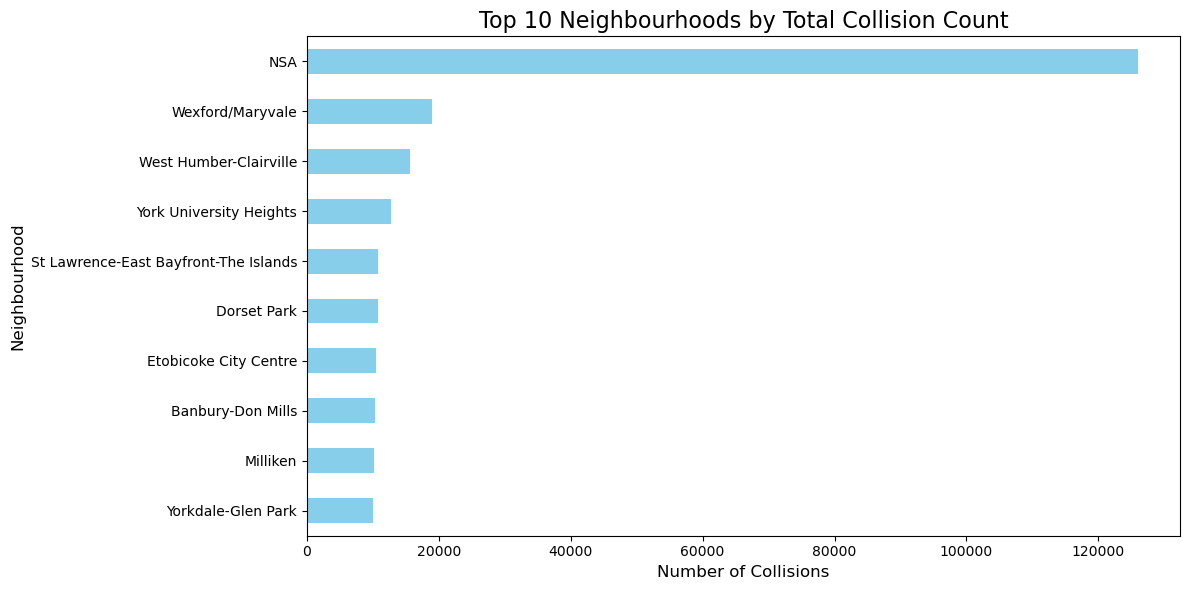

In [9]:
# --- Top 10 Neighbourhoods by Collision Count ---
# Aggregate and get the top 10
top_10_neighbourhoods = traffic_collisions['Neighbourhood'].value_counts().head(10)

plt.figure(figsize=(12, 6))
# Plot as a horizontal bar chart, sorted for better readability
top_10_neighbourhoods.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighbourhoods by Total Collision Count', fontsize=16)
plt.xlabel('Number of Collisions', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.tight_layout()
plt.show()

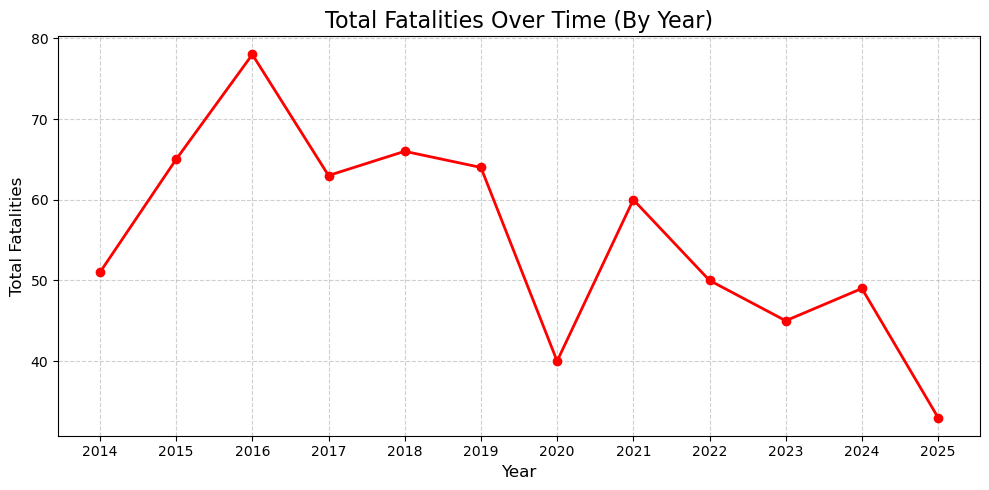

In [10]:
# --- Total Fatalities by Year (Time-series) ---
# Aggregate fatalities by year
fatalities_by_year = traffic_collisions.groupby('Year')['Fatalities'].sum()

plt.figure(figsize=(10, 5))
# Plot as a line chart to show trend
fatalities_by_year.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Total Fatalities Over Time (By Year)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
# Set x-ticks to ensure all years are shown
if fatalities_by_year.index.size > 0:
    plt.xticks(np.arange(fatalities_by_year.index.min(), fatalities_by_year.index.max() + 1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

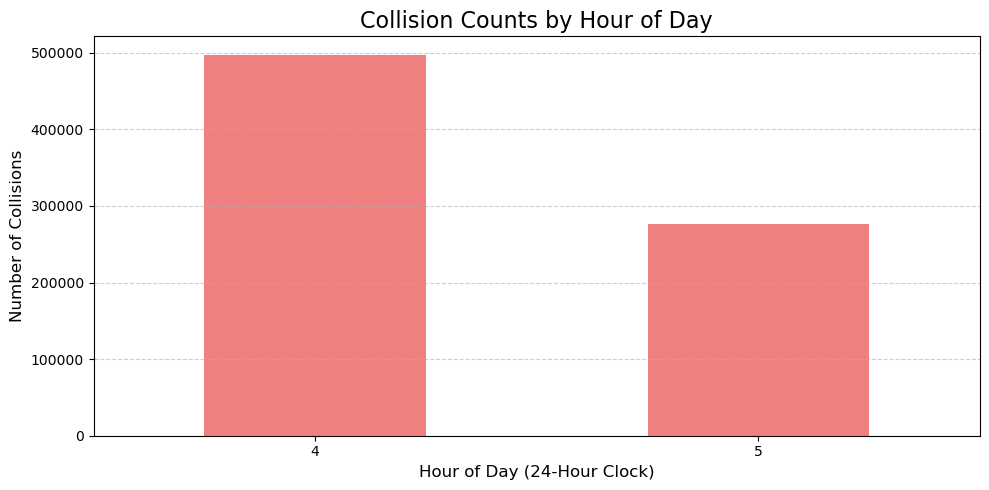

In [11]:
# --- Collision Counts by Hour of Day (Peak Times) ---
# Aggregate collision counts by the hour of day
collisions_by_hour = traffic_collisions['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
# Plot as a bar chart to show distribution/peaks
collisions_by_hour.plot(kind='bar', color='lightcoral')
plt.title('Collision Counts by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

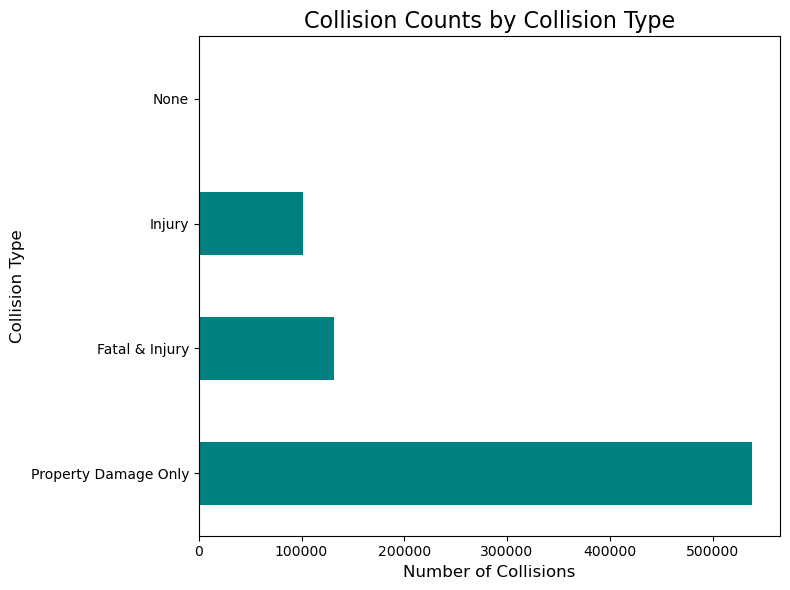

In [12]:
# --- Collision Counts ---
plt.figure(figsize=(8, 6))
collision_type_counts.plot(kind='barh', color='teal')
plt.title('Collision Counts by Collision Type', fontsize=16)
plt.xlabel('Number of Collisions', fontsize=12)
plt.ylabel('Collision Type', fontsize=12)
plt.tight_layout()
plt.show()

## Person in Crisis

In [13]:
person_in_crisis = pd.read_csv('../../data/02_processed_data/05_crime_by_city_data/Toronto/Person_in_Crisis.csv')

In [14]:
person_in_crisis.head()

,Object_ID,Accident_Date,Event_Type,Neighbourhood
0,1,1/1/2014 5:00:00 AM,Suicide-related,West Hill (136)
1,2,1/1/2014 5:00:00 AM,Suicide-related,Cabbagetown-South St.James Town (71)
2,3,1/1/2014 5:00:00 AM,Overdose,High Park North (88)
3,4,1/1/2014 5:00:00 AM,Suicide-related,Kingsview Village-The Westway (6)
4,5,1/1/2014 5:00:00 AM,Person in Crisis,Glenfield-Jane Heights (25)


In [15]:
person_in_crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344935 entries, 0 to 344934
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Object_ID      344935 non-null  int64 
 1   Accident_Date  344935 non-null  object
 2   Event_Type     344935 non-null  object
 3   Neighbourhood  344935 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.5+ MB


In [16]:
person_in_crisis.describe()

,Object_ID
count,344935.000000
mean,172468.000000
std,99574.301889
min,1.000000
25%,86234.500000
50%,172468.000000
75%,258701.500000
max,344935.000000


In [17]:
# Convert Accident_Date to datetime
person_in_crisis['Accident_Date'] = pd.to_datetime(person_in_crisis['Accident_Date'])

# Extract year, month for analysis
person_in_crisis['Year'] = person_in_crisis['Accident_Date'].dt.year
person_in_crisis['Month'] = person_in_crisis['Accident_Date'].dt.month

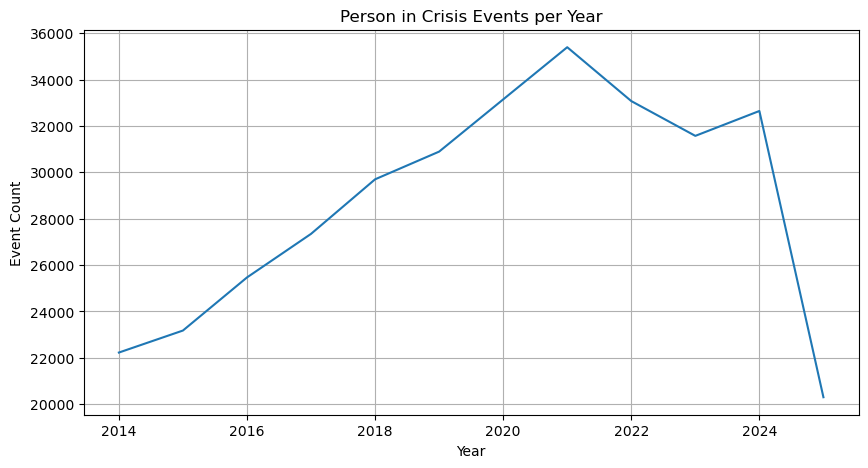

In [19]:
# --- Count of events by year ---

events_year = person_in_crisis.groupby('Year').size()

plt.figure(figsize=(10,5))
plt.plot(events_year.index, events_year.values)
plt.xlabel("Year")
plt.ylabel("Event Count")
plt.title("Person in Crisis Events per Year")
plt.grid(True)
plt.show()

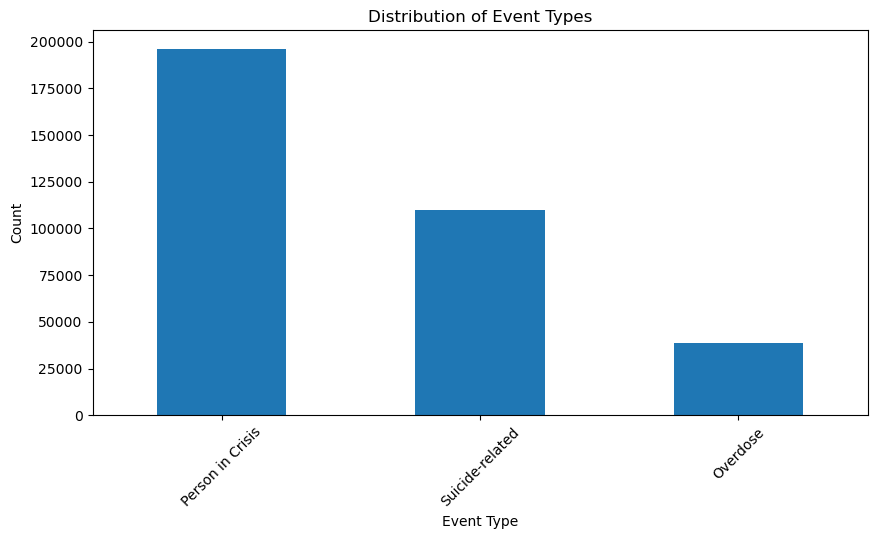

In [20]:
# --- Count of events by Event Type ---

events_type = person_in_crisis['Event_Type'].value_counts()

plt.figure(figsize=(10,5))
events_type.plot(kind='bar')
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Distribution of Event Types")
plt.xticks(rotation=45)
plt.show()

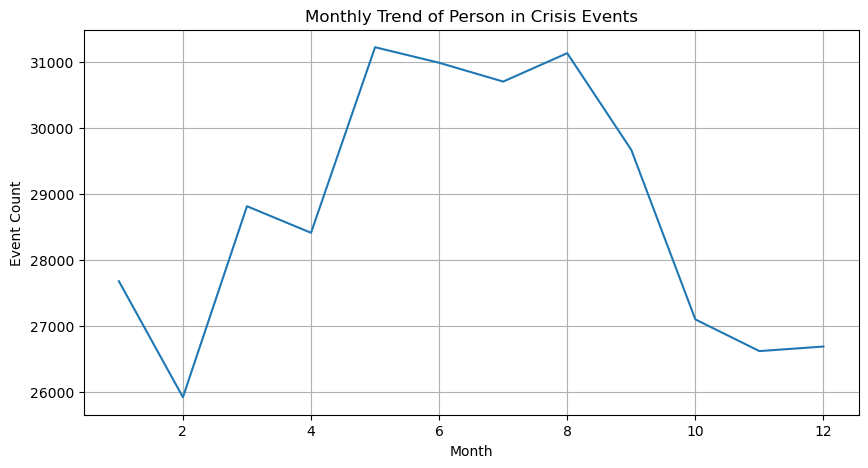

In [21]:
# --- Monthly trend (all years combined) ---

events_month = person_in_crisis['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(events_month.index, events_month.values)
plt.xlabel("Month")
plt.ylabel("Event Count")
plt.title("Monthly Trend of Person in Crisis Events")
plt.grid(True)
plt.show()

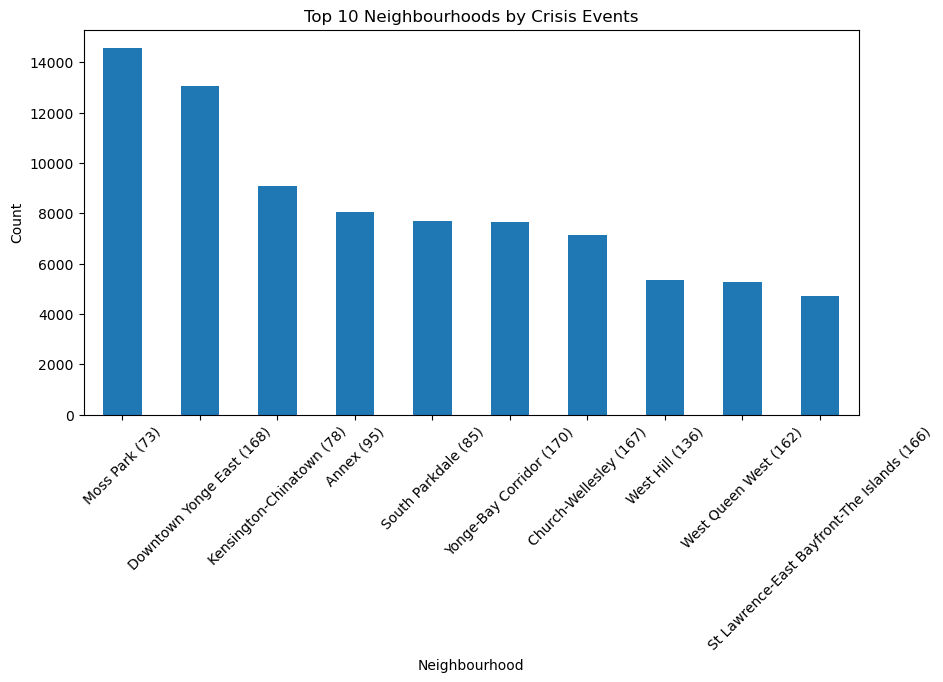

In [22]:
# --- Top 10 neighbourhoods with highest crisis events ---
top_neighbourhoods = person_in_crisis['Neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_neighbourhoods.plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("Top 10 Neighbourhoods by Crisis Events")
plt.xticks(rotation=45)
plt.show()

## Calls for Service Attended

In [23]:
calls_for_service_attended = pd.read_csv('../../data/02_processed_data/05_crime_by_city_data/Toronto/Calls_for_Service_Attended.csv')

In [24]:
calls_for_service_attended.head()

,Object_ID,Year,Event_Count,Neighbourhood
0,1,2015,648,Lambton Baby Point (114)
1,2,2015,1886,Weston-Pelham Park (091)
2,3,2015,2,Stonegate-Queensway (016)
3,4,2015,4,Harbourfront-CityPlace (165)
4,5,2015,83,Little Portugal (084)


In [25]:
calls_for_service_attended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Object_ID      5399 non-null   int64 
 1   Year           5399 non-null   int64 
 2   Event_Count    5399 non-null   int64 
 3   Neighbourhood  5399 non-null   object
dtypes: int64(3), object(1)
memory usage: 168.8+ KB


In [26]:
calls_for_service_attended.describe()

,Object_ID,Year,Event_Count
count,5399.000000,5399.000000,5399.000000
mean,2700.000000,2019.774403,766.663827
std,1558.701383,2.790951,1393.355793
min,1.000000,2015.000000,1.000000
25%,1350.500000,2018.000000,1.000000
50%,2700.000000,2020.000000,9.000000
75%,4049.500000,2022.000000,1139.000000
max,5399.000000,2024.000000,12779.000000


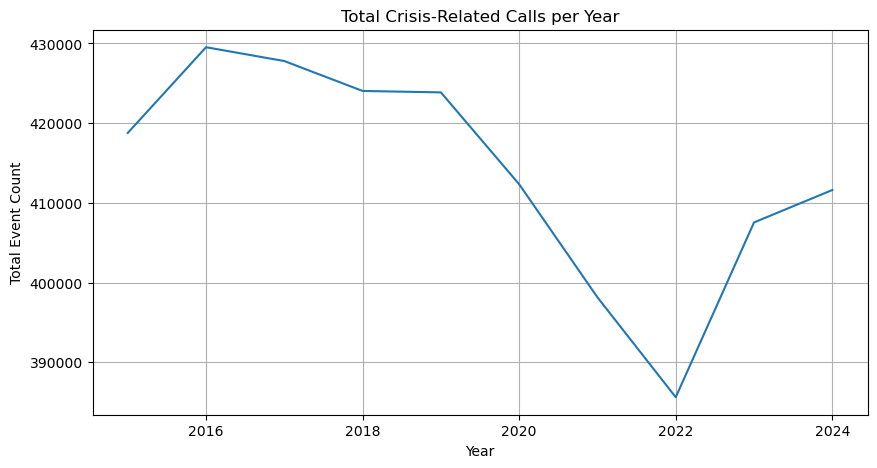

In [28]:
# --- Total events by year ---
events_by_year = calls_for_service_attended.groupby('Year')['Event_Count'].sum()

plt.figure(figsize=(10,5))
plt.plot(events_by_year.index, events_by_year.values)
plt.xlabel("Year")
plt.ylabel("Total Event Count")
plt.title("Total Crisis-Related Calls per Year")
plt.grid(True)
plt.show()

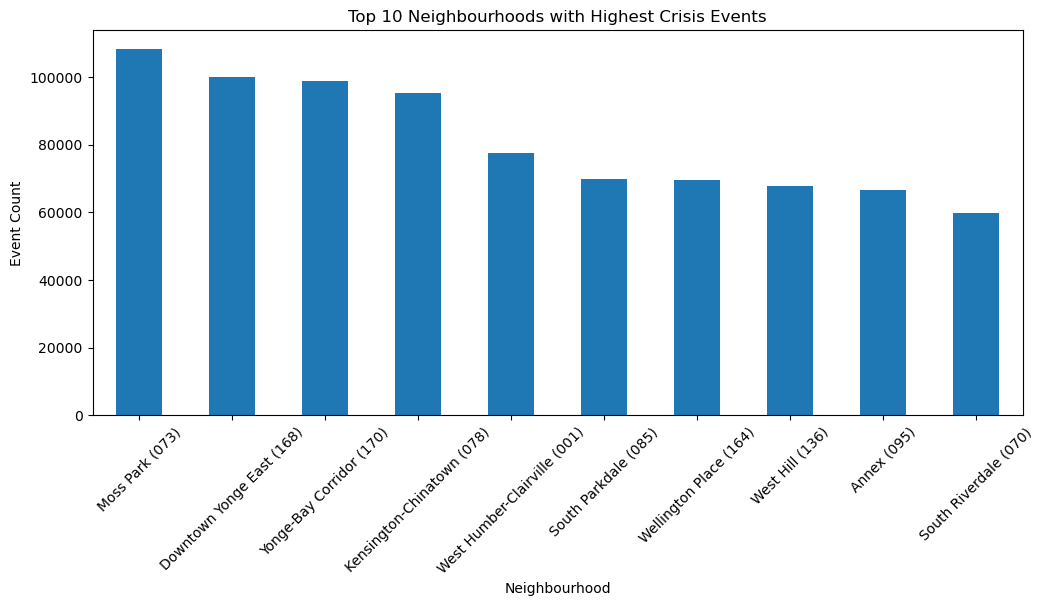

In [29]:
# --- Top 10 neighbourhoods with highest crisis events ---
top_10_neighbourhoods = calls_for_service_attended.groupby('Neighbourhood')['Event_Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_10_neighbourhoods.plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Event Count")
plt.title("Top 10 Neighbourhoods with Highest Crisis Events")
plt.xticks(rotation=45)
plt.show()

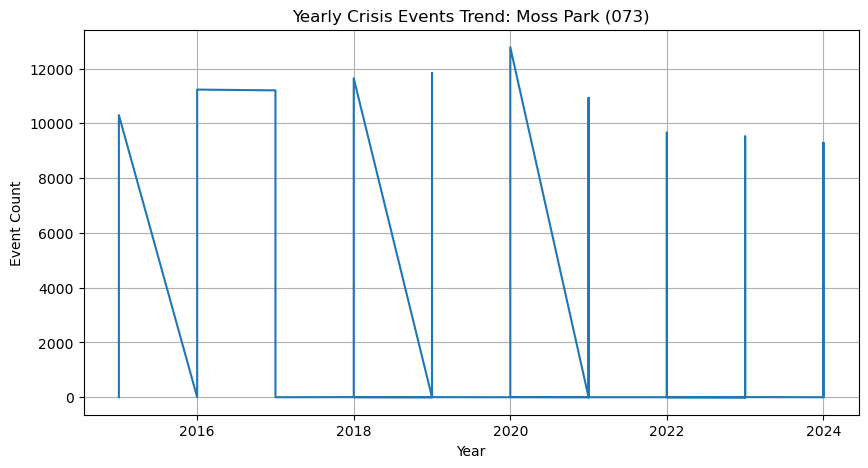

In [31]:
# --- Trend of events by neighbourhood (optional single neighbourhood example) ---
nbh = 'Moss Park (073)'
neighbourhood_trend = calls_for_service_attended[calls_for_service_attended['Neighbourhood'] == nbh]

plt.figure(figsize=(10,5))
plt.plot(neighbourhood_trend['Year'], neighbourhood_trend['Event_Count'])
plt.xlabel("Year")
plt.ylabel("Event Count")
plt.title(f"Yearly Crisis Events Trend: {nbh}")
plt.grid(True)
plt.show()

Year
2016    429526
2017    427791
2018    424040
2019    423858
2015    418768
Name: Event_Count, dtype: int64


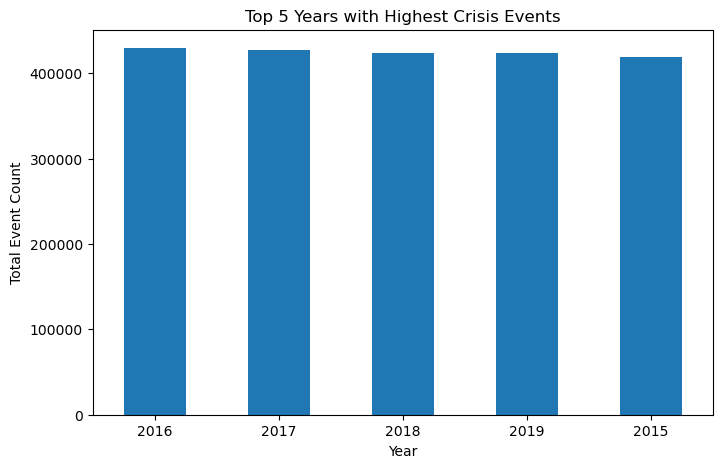

In [32]:
# --- Top 5 years with highest total crisis events ---
top_years = events_by_year.sort_values(ascending=False).head(5)
print(top_years)

# --- Bar chart for top 5 years ---
plt.figure(figsize=(8,5))
top_years.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Total Event Count")
plt.title("Top 5 Years with Highest Crisis Events")
plt.xticks(rotation=0)
plt.show()

# Edmonton Data Analysis

In [33]:
edmonton_crimes = pd.read_parquet('../../data/02_processed_data/05_crime_by_city_data/Edmonton/Edmonton_Crimes.parquet')

In [34]:
edmonton_crimes.head()

,OBJECTID,Occurrence_Category,Occurrence_Group,Occurrence_Type_Group,Intersection,Date Reported,longitude,latitude,Full_Address
0,1,Disorder,Provincial Statute Violations,Intoxicated Person,104 ST/31 AV,2022/01/01,-113.496768,53.463666,"104 ST/31 AV, Edmonton, AB, Canada"
1,2,Non-Violent,Abandoned/Recovered/Seized Vehicles,Recovered Motor Vehicle,62 ST/14 AV,2022/01/01,-113.432301,53.443560,"62 ST/14 AV, Edmonton, AB, Canada"
2,3,Non-Violent,Property,Fraud General,140 AV/64 ST,2022/01/02,-113.439516,53.431088,"140 AV/64 ST, Edmonton, AB, Canada"
3,4,Non-Violent,Property,Theft Under $5000,153 AV/153 AV,2022/01/01,-113.520219,53.615546,"153 AV/153 AV, Edmonton, AB, Canada"
4,5,Violent,Personal Violence,Robbery Personal,139 AV/40 ST,2022/01/01,-113.404201,53.600051,"139 AV/40 ST, Edmonton, AB, Canada"


In [35]:
edmonton_crimes['Date Reported'] = pd.to_datetime(edmonton_crimes['Date Reported'])

edmonton_crimes['Year'] = edmonton_crimes['Date Reported'].dt.year
edmonton_crimes['Month'] = edmonton_crimes['Date Reported'].dt.month

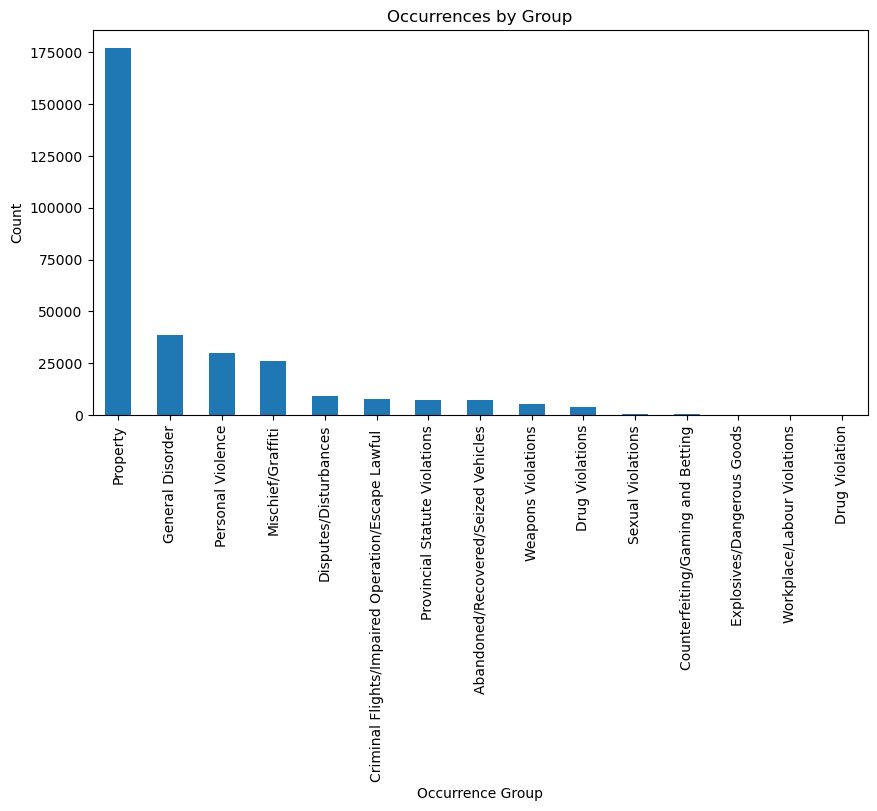

In [37]:
# --- Count occurrences by Occurrence Group ---
occ_group_counts = edmonton_crimes['Occurrence_Group'].value_counts()

plt.figure(figsize=(10,5))
occ_group_counts.plot(kind='bar')
plt.xlabel("Occurrence Group")
plt.ylabel("Count")
plt.title("Occurrences by Group")
plt.xticks(rotation=90)
plt.show()

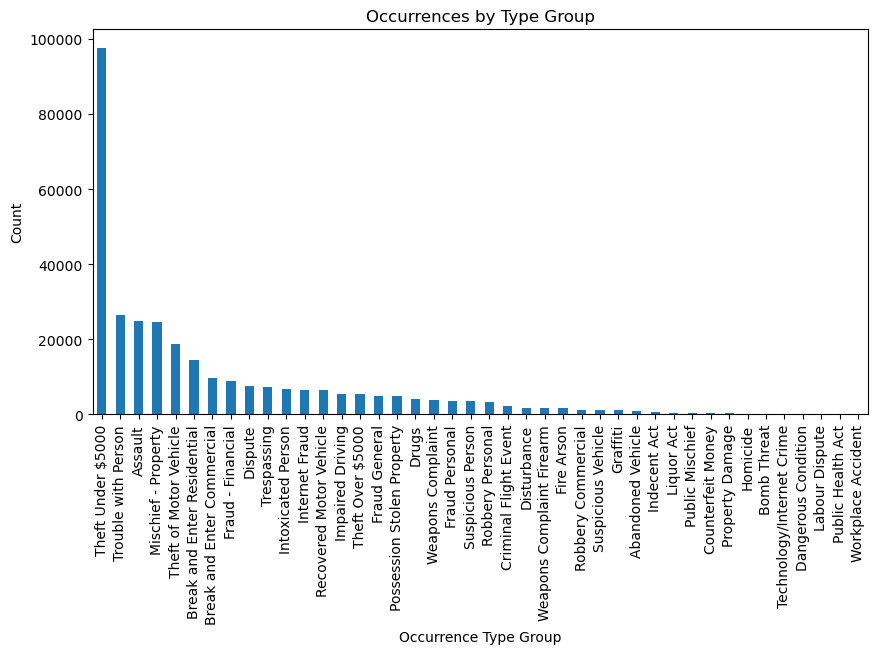

In [39]:
# --- Count occurrences by Occurrence Type Group ---
occ_type_counts = edmonton_crimes['Occurrence_Type_Group'].value_counts()

plt.figure(figsize=(10,5))
occ_type_counts.plot(kind='bar')
plt.xlabel("Occurrence Type Group")
plt.ylabel("Count")
plt.title("Occurrences by Type Group")
plt.xticks(rotation=90)
plt.show()

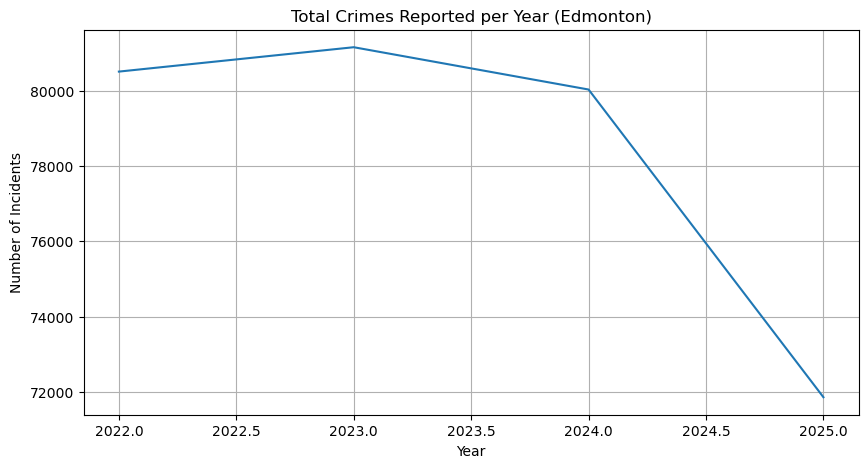

In [40]:
# --- Crimes reported per year ---
yearly_crimes = edmonton_crimes.groupby('Year').size()

plt.figure(figsize=(10,5))
plt.plot(yearly_crimes.index, yearly_crimes.values)
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Total Crimes Reported per Year (Edmonton)")
plt.grid(True)
plt.show()


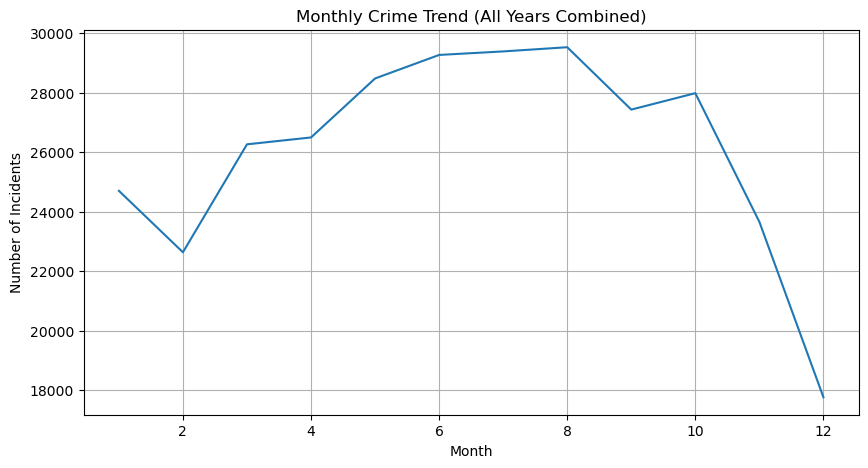

In [41]:
# --- Crimes reported per month (all years combined) ---
monthly_crimes = edmonton_crimes['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_crimes.index, monthly_crimes.values)
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("Monthly Crime Trend (All Years Combined)")
plt.grid(True)
plt.show()


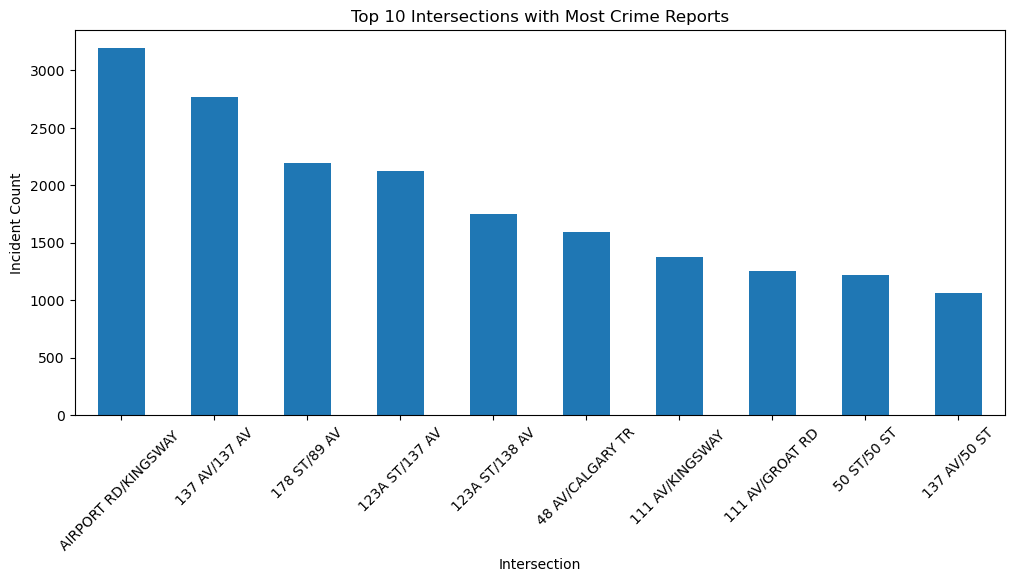

In [42]:
# --- Top 10 most common intersections ---
top_intersections = edmonton_crimes['Intersection'].value_counts().head(10)

plt.figure(figsize=(12,5))
top_intersections.plot(kind='bar')
plt.xlabel("Intersection")
plt.ylabel("Incident Count")
plt.title("Top 10 Intersections with Most Crime Reports")
plt.xticks(rotation=45)
plt.show()

# Vancouver Data Analysis

In [62]:
vancouver_crimes = pd.read_csv('../../data/02_processed_data/05_crime_by_city_data/Vancouver/Vancouver_Crimes.csv')

In [63]:
vancouver_crimes

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,Date_Reported,longitude,latitude
0,Break and Enter Commercial,10XX ALBERNI ST,West End,2014-04-17,-123.123311,49.285034
1,Break and Enter Commercial,10XX ALBERNI ST,West End,2014-09-01,-123.123311,49.285034
2,Break and Enter Commercial,10XX ALBERNI ST,West End,2014-11-22,-123.122937,49.284788
3,Break and Enter Commercial,10XX ALBERNI ST,West End,2014-03-01,-123.122810,49.284822
4,Break and Enter Commercial,10XX BARCLAY ST,West End,2014-12-31,-123.126215,49.282786
...,...,...,...,...,...,...
462385,Vehicle Collision or Pedestrian Struck (with I...,W 54TH AVE / GRANVILLE ST,Kerrisdale,2025-05-30,-123.140022,49.221700
462386,Vehicle Collision or Pedestrian Struck (with I...,W 54TH AVE / OAK LANE,Oakridge,2025-04-16,-123.127716,49.221516
462387,Break and Enter Commercial,7X WALTER HARDWICK AVE,Mount Pleasant,2025-02-12,-123.106004,49.270956
462388,Break and Enter Commercial,7XX BURRARD ST,West End,2025-02-08,-123.122528,49.283518


In [64]:
vancouver_crimes['Date_Reported'] = pd.to_datetime(vancouver_crimes['Date_Reported'])
vancouver_crimes['Year'] = vancouver_crimes['Date_Reported'].dt.year
vancouver_crimes['Month'] = vancouver_crimes['Date_Reported'].dt.month

In [65]:
vancouver_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462390 entries, 0 to 462389
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           462390 non-null  object        
 1   HUNDRED_BLOCK  462390 non-null  object        
 2   NEIGHBOURHOOD  462322 non-null  object        
 3   Date_Reported  462390 non-null  datetime64[ns]
 4   longitude      462375 non-null  float64       
 5   latitude       462375 non-null  float64       
 6   Year           462390 non-null  int32         
 7   Month          462390 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 24.7+ MB


In [66]:
vancouver_crimes.describe()

,Date_Reported,longitude,latitude,Year,Month
count,462390,462375.000000,462375.000000,462390.000000,462390.000000
mean,2019-08-29 04:48:37.931616512,-123.499785,44.842488,2019.159102,6.532592
min,2014-01-01 00:00:00,-127.488744,0.000000,2014.000000,1.000000
25%,2016-10-17 00:00:00,-123.132497,49.243986,2016.000000,4.000000
50%,2019-06-15 00:00:00,-123.114945,49.269307,2019.000000,7.000000
75%,2022-07-10 00:00:00,-123.093732,49.281387,2022.000000,9.000000
max,2025-11-21 00:00:00,-122.890414,49.755319,2025.000000,12.000000
std,NaN,1.253208,14.083200,3.342906,3.384782


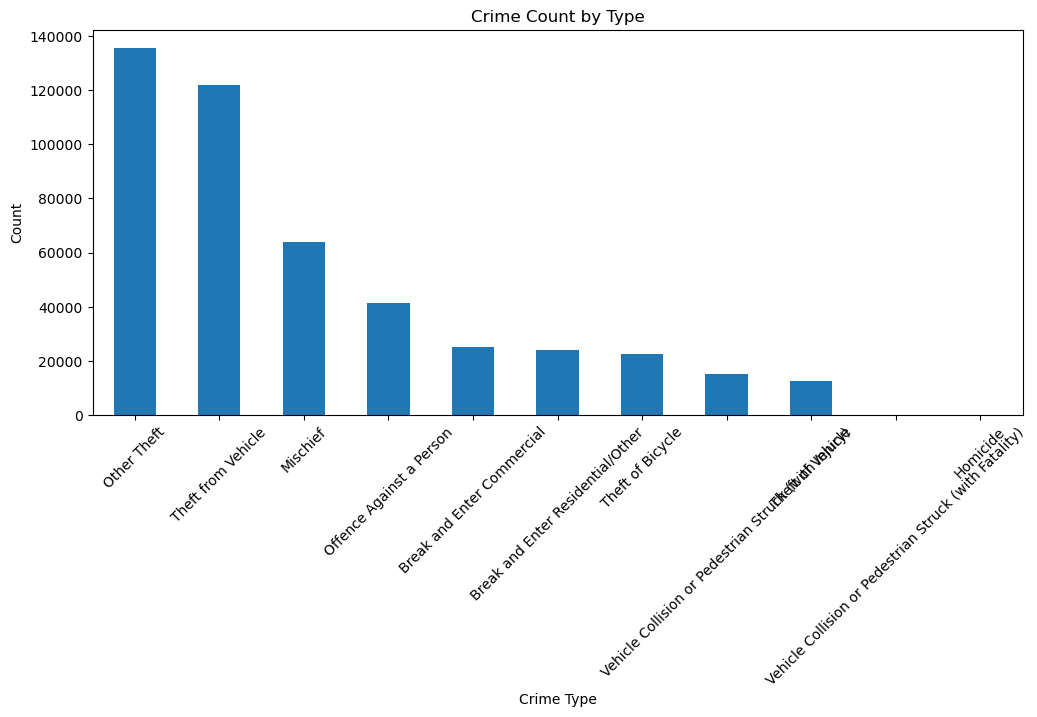

In [67]:
# --- Crime count by type ---
crime_type_counts = vancouver_crimes['TYPE'].value_counts()

plt.figure(figsize=(12,5))
crime_type_counts.plot(kind='bar')
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.title("Crime Count by Type")
plt.xticks(rotation=45)
plt.show()

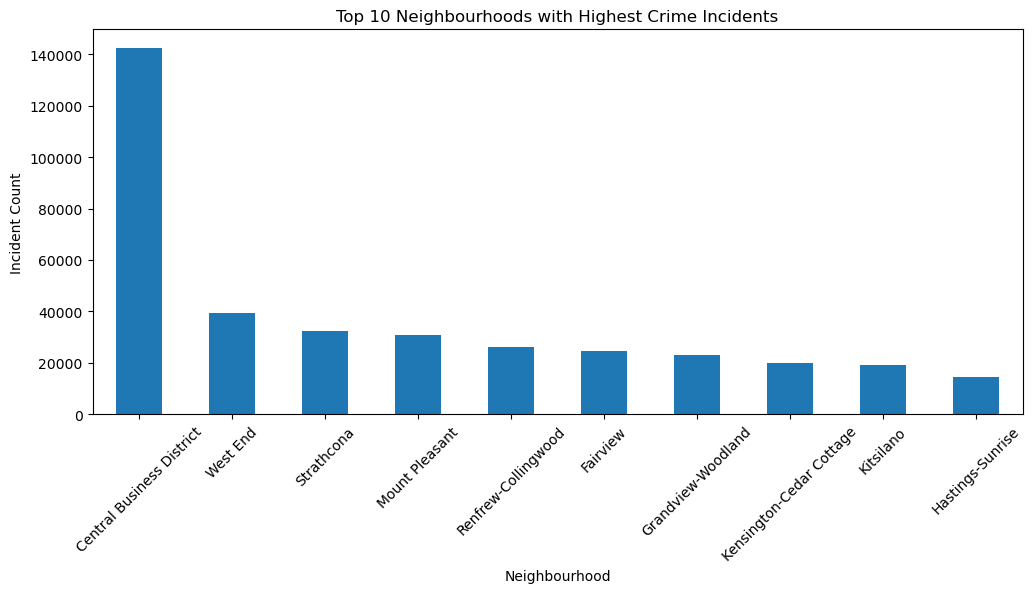

In [68]:
# --- Top 10 neighbourhoods with highest crime incidents ---
top_neighbourhoods = vancouver_crimes['NEIGHBOURHOOD'].value_counts().head(10)

plt.figure(figsize=(12,5))
top_neighbourhoods.plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Incident Count")
plt.title("Top 10 Neighbourhoods with Highest Crime Incidents")
plt.xticks(rotation=45)
plt.show()

In [69]:
yearly_crimes = vancouver_crimes.groupby('Year').size()

yearly_crimes

Year
2014    39182
2015    40203
2016    44085
2017    43207
2018    44249
2019    48158
2020    37511
2021    32201
2022    34348
2023    36727
2024    33772
2025    28747
dtype: int64

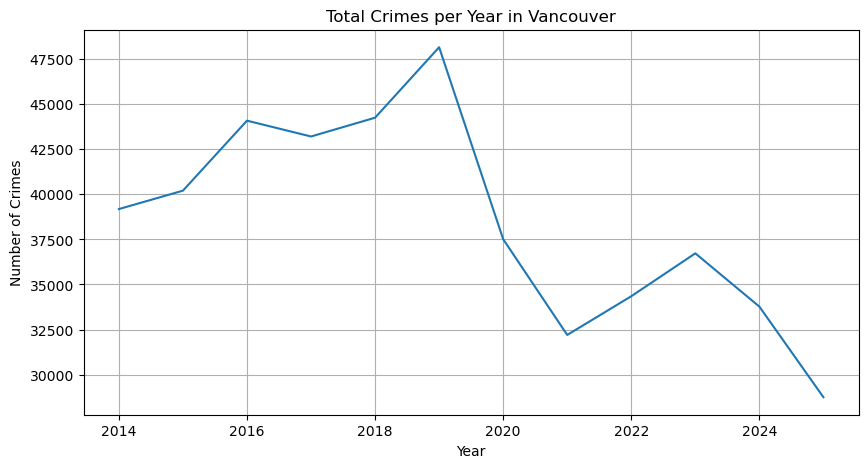

In [70]:
# --- Crimes per year ---
yearly_crimes = vancouver_crimes.groupby('Year').size()

plt.figure(figsize=(10,5))
plt.plot(yearly_crimes.index, yearly_crimes.values)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Crimes per Year in Vancouver")
plt.grid(True)
plt.show()

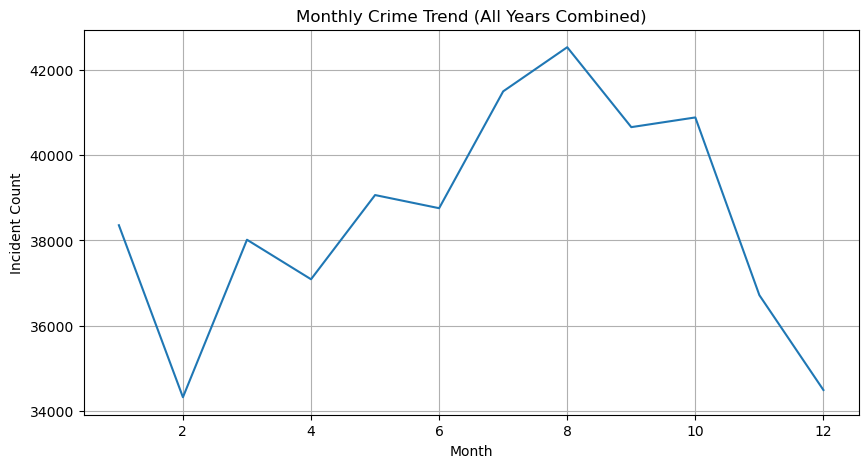

In [71]:
# --- Crimes per month (all years combined) ---
monthly_crimes = vancouver_crimes['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_crimes.index, monthly_crimes.values)
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.title("Monthly Crime Trend (All Years Combined)")
plt.grid(True)
plt.show()

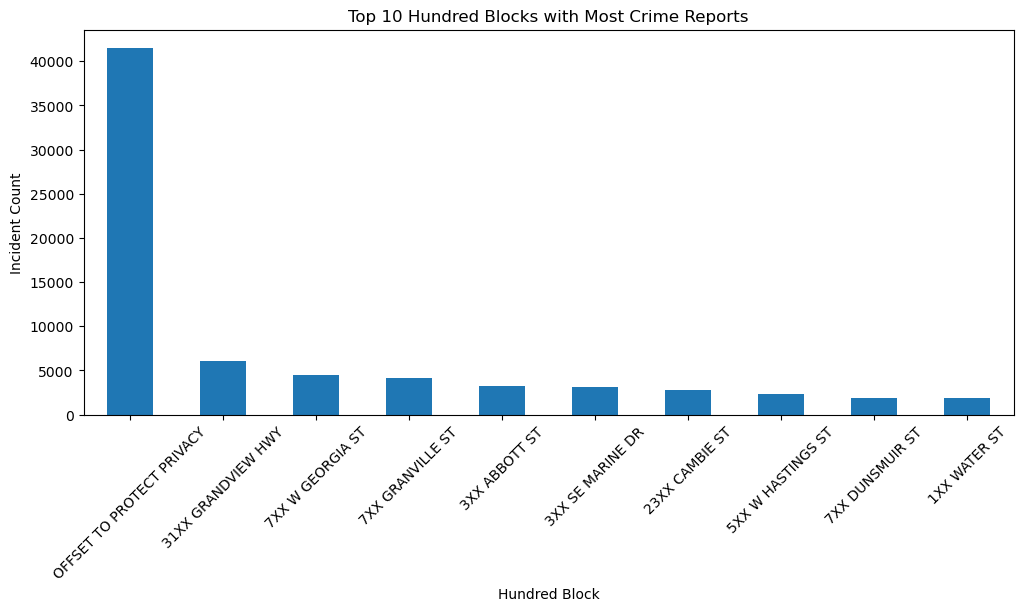

In [72]:
# --- Top 10 most frequent hundred blocks ---
top_blocks = vancouver_crimes['HUNDRED_BLOCK'].value_counts().head(10)

plt.figure(figsize=(12,5))
top_blocks.plot(kind='bar')
plt.xlabel("Hundred Block")
plt.ylabel("Incident Count")
plt.title("Top 10 Hundred Blocks with Most Crime Reports")
plt.xticks(rotation=45)
plt.show()